# The Beam Driven Plasma Wake Field Acceleration (Nonlinear regime)

## Our main goal is to calculate the accelerating field: $E_z$ and the focusing force: $\textbf F_\perp$

Starting from Maxwell equations in Lorentz gauge: 
$$(\frac{\partial^2}{\partial t^2}-{\nabla}^2)\textbf A =  \textbf J\;\;\;\;\;(\frac{\partial^2}{\partial t^2}-{\nabla}^2)\phi = \rho$$

Apply quasistatic approximation: $(x,y,z,t) \rightarrow (x,y,\xi = ct - z, s = z )$ and neglect $\frac{\partial}{\partial s}$, we get:

$$-{\nabla_\perp}^2\textbf A(x,y,\xi) =  \textbf J(x,y,\xi) \;\;\;\;\; -{\nabla_\perp}^2 \phi(x,y,\xi) = \rho(x,y,\xi)$$
Subtract the $z$ component of the first equation from the second equation, we obtain:

$${\nabla_\perp}^2 \psi = -({\rho} - J_z)$$

where $\psi = \phi - A_z$ called pseudo potential.

Calculating fields from the potentials: $\textbf B = \nabla  \times \textbf A$, $\textbf E = -\nabla \phi - \frac{1}{c}\frac{\partial \textbf A}{\partial t}$ and Lorentz force: $\textbf F =-( \textbf E + \hat{z} \times \textbf B)$, we get:

* The accelerating field is : $E_z = \frac{\partial \psi}{\partial \xi}$ 
* The focusing force is : $\textbf F_\perp = \nabla_\perp \psi$

Our goal reduces to solving for $\psi$. It is a 2D Poisson equation! But we need to make some assumptions about the source term: $-({\rho} - J_z)$ 

We assume the source term to have the following profile:

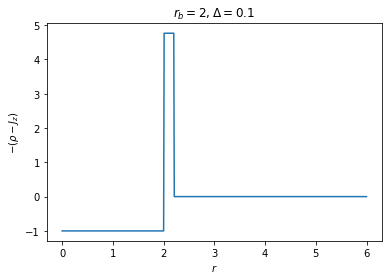

In [1]:
import matplotlib.pyplot as plt
import numpy as np
rb = 2
Delta = 0.2
epsilon = 0.01
peak = rb**2/((rb+Delta)**2 - rb**2)
r = [0,rb,rb+epsilon,rb+Delta,rb+Delta+epsilon,3*rb]
source = [-1,-1,peak,peak,0,0]
plt.plot(r,source)
plt.xlabel('$r$')
plt.ylabel('$-(\\rho - J_z)$')
plt.yticks(np.arange(-1, 6, 1))
plt.title('$r_b = 2, \Delta = 0.1$') 
plt.show()

The peak density in the sheath is determined from the continuity equation. For any $\xi$ we have: $\int_0^{\infty}(\rho - J_z) r dr = 0$. From this we get the peak density in the sheath is: $\frac{r_b^2}{(r_b + \Delta)^2 - r_b^2}$

So far we have got the source profile. So we can solve the 2D poisson equation (Actually, just 1D in $r$ since we assume azimuthal symmetry) and get $\psi$. The final solution is:

$$\psi(r,\xi) = \psi_0(\xi) - \frac{r^2}{4} = \frac{r_b(\xi)^2}{4}(1+\beta) - \frac{r^2}{4}$$

where $\beta = \frac{(1+\alpha)^2 \ln(1+\alpha)^2}{(1+\alpha)^2-1}-1 $, and $\alpha = \frac{\Delta}{r_b}$

 
* The focusing force is : $\textbf F_\perp = \nabla_\perp \psi = - \frac{\textbf r}{2} $, which is independent of $\xi$.
* The accelerating field is : $E_z = \frac{\partial \psi}{\partial \xi}= \frac{d \psi_0(\xi)}{d \xi}$, which is independent of $r$.
 
In the untrarelativistic limit, $\alpha$ goes to 0, $\beta$ goes to 0 as well. Then:

$$E_z(\xi) = \frac{d}{d \xi}(\frac{r_b(\xi)^2}{4}) = \frac{1}{2}r_b(\xi)\frac{dr_b(\xi)}{d\xi}$$

Then we may ask: How can we solve for the boundary of the ion bubble: $r_b(\xi)$? This can be obtained from the equation of motion for an electron on the boundary, but the math is quite complicated. For details, see https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.96.165002

In the untrarelativistic limit, $r_b(\xi)$ is described by:

$$r_b\frac{d^2r_b}{d\xi^2} + 2[\frac{dr_b}{d\xi}]^2+1=\frac{4\lambda(\xi)}{r_b^2}$$

where $\lambda(\xi) = \int_0^\infty rn_b dr$, is the charge per unit length of an electron beam (drive or trailing beam) divided by $2\pi$.

## 1. Make an input file
* In the same directory as this Jupyter notebook, there must be a template input file (the default name is qpinput_template.json) and two python files: mkQPinput.py and pyVisQP.py

In [2]:
from importlib import reload
import mkQPinput
mkQPinput = reload(mkQPinput)
mkQPinput.makeWidgetsForInput()

interactive(children=(Text(value='qpinput_template.json', description='Template Input File:', layout=Layout(wi…

## 2. Run QuickPIC simulation

In [3]:
import quickpic
dirname = 'rundir'
quickpic.runqpic(rundir=dirname,inputfile='qpinput.json')

quickpic completed normally


## 3. Visualize the output data
### 1. Plasma and beam density

In [4]:
from importlib import reload
import pyVisQP
pyVisQP = reload(pyVisQP)

dirname = 'rundir'

# LineoutDir can be chosen from: None, 'transverse', 'longitudinal'

# Plot the charge density of plasma and beam
filename1 = dirname +'/Species0001/Charge_slice_0001/charge_slice_xz_00000001.h5'
filename2 = dirname +'/Beam0001/Charge_slice_0001/charge_slice_xz_00000001.h5'
filenameList = [filename1,filename2]
scaleList = [1,1]
pyVisQP.makeplot(filenameList,scaleList,LineoutDir = None)

interactive(children=(FloatRangeSlider(value=(-5.0, 0.0), continuous_update=False, description='Colorbar:', ma…

### 2. Accelerating field: $E_z$
* Transverse lineout

In [5]:
# Plot the accelerating field with transverse lineout
filename = dirname +'/Fields/Ez_slice0001/ezslicexz_00000001.h5'
filenameList = [filename]
pyVisQP.makeplot(filenameList,LineoutDir = 'transverse',specify_title = '$E_z \; [mc\omega_p / e]$')

interactive(children=(FloatRangeSlider(value=(-1.0, 1.0), continuous_update=False, description='Colorbar:', ma…

### We can see that the accelerating field $E_z$ is uniform along transverse direction. So the beam particles within the same longitudinal slice will gain energy at the same rate.
* Longitudinal lineout

In [7]:
# Plot the plasma density and get the boundary of the ion bubble
filename = dirname +'/Species0001/Charge_slice_0001/charge_slice_xz_00000001.h5'
filenameList = [filename]
pyVisQP.makeplot(filenameList,LineoutDir = None)

interactive(children=(FloatRangeSlider(value=(-5.0, 0.0), continuous_update=False, description='Colorbar:', ma…

In [9]:
# Plot the accelerating field with longitudinal lineout, and also the theoretical plot.
pyVisQP = reload(pyVisQP)
filename = dirname +'/Fields/Ez_slice0001/ezslicexz_00000001.h5'
filenameList = [filename]
pyVisQP.makeplot(filenameList,LineoutDir = 'longitudinal',specify_title = '$E_z \; [mc\omega_p / e]$')

interactive(children=(FloatRangeSlider(value=(-1.0, 1.0), continuous_update=False, description='Colorbar:', ma…

### 3. Focusing force
* Transverse lineout


In [10]:
# Plot the x component of the focusing force : Fx with transverse and longitudinal lineout
filename1 = dirname + '/Fields/Ex_slice0001/exslicexz_00000001.h5'
filename2 = dirname + '/Fields/By_slice0001/byslicexz_00000001.h5'
filenameList = [filename1,filename2]
scaleList = [-1,1]
pyVisQP.makeplot(filenameList,scaleList,LineoutDir = 'transverse',specify_title = '$F_x \; [mc\omega_p]$',Show_theory = 'focus')

interactive(children=(FloatRangeSlider(value=(-1.0, 1.0), continuous_update=False, description='Colorbar:', ma…

### We can see that the focusing force $F_x$ is linear in transverse direction. Linear focusing force preserve the emittance of a monoenergetic beam. Also, due to the linear focusing force, the motion in $x$ and $y$ directions are decoupled.
* Longitudinal lineout

In [11]:
pyVisQP.makeplot(filenameList,scaleList,LineoutDir = 'longitudinal',specify_title = '$F_x \; [mc\omega_p]$',Show_theory = 'focus')

interactive(children=(FloatRangeSlider(value=(-1.0, 1.0), continuous_update=False, description='Colorbar:', ma…

### We can see that the focusing force $F_x$ does not depend on the longitudinal position. This ensures that the beam particles at different longitudinal positions will oscillate at the same betatron frequency, if they have the same energy.